# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
    
        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
    

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | chonchi
Processing Record 3 of Set 1 | lihue
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | villa gesell
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | khanty-mansiysk
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | rongelap
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | susuman
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | howrah
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | hamilton
Processing Record 22 of Set 1 | el calafate
Proce

Processing Record 36 of Set 4 | la ronge
Processing Record 37 of Set 4 | georgetown
Processing Record 38 of Set 4 | mandalgovi
Processing Record 39 of Set 4 | egilsstadir
Processing Record 40 of Set 4 | alotau
City not found. Skipping...
Processing Record 41 of Set 4 | tolanaro
Processing Record 42 of Set 4 | fort bragg
Processing Record 43 of Set 4 | kununurra
Processing Record 44 of Set 4 | port sudan
Processing Record 45 of Set 4 | nola
Processing Record 46 of Set 4 | olinda
Processing Record 47 of Set 4 | jiuquan
Processing Record 48 of Set 4 | muroto-misakicho
Processing Record 49 of Set 4 | poso
Processing Record 0 of Set 5 | ado-odo
Processing Record 1 of Set 5 | haiku-pauwela
Processing Record 2 of Set 5 | boguchany
Processing Record 3 of Set 5 | yorosso
Processing Record 4 of Set 5 | tura
Processing Record 5 of Set 5 | takamaka
City not found. Skipping...
Processing Record 6 of Set 5 | bayston hill
Processing Record 7 of Set 5 | greymouth
Processing Record 8 of Set 5 | nieuw a

Processing Record 31 of Set 8 | horta
Processing Record 32 of Set 8 | taulaga
Processing Record 33 of Set 8 | san patricio
Processing Record 34 of Set 8 | likiep
Processing Record 35 of Set 8 | sisimiut
Processing Record 36 of Set 8 | hardheim
Processing Record 37 of Set 8 | talara
Processing Record 38 of Set 8 | portage
Processing Record 39 of Set 8 | an nuhud
Processing Record 40 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 41 of Set 8 | enriquillo
Processing Record 42 of Set 8 | mmabatho
Processing Record 43 of Set 8 | kurchatov
Processing Record 44 of Set 8 | noshiro
Processing Record 45 of Set 8 | kondrovo
Processing Record 46 of Set 8 | iskateley
Processing Record 47 of Set 8 | richland center
Processing Record 48 of Set 8 | luganville
Processing Record 49 of Set 8 | mount gambier
Processing Record 0 of Set 9 | duong dong
Processing Record 1 of Set 9 | beeskow
Processing Record 2 of Set 9 | salinopolis
Processing Record 3 of Set 9 | port macquarie
Processing

Processing Record 22 of Set 12 | nikolayevsk-on-amure
Processing Record 23 of Set 12 | cootamundra
Processing Record 24 of Set 12 | kapoeta
Processing Record 25 of Set 12 | los chavez
Processing Record 26 of Set 12 | san juan de miraflores
Processing Record 27 of Set 12 | la rioja
Processing Record 28 of Set 12 | nampa
Processing Record 29 of Set 12 | njombe
Processing Record 30 of Set 12 | enewetak
Processing Record 31 of Set 12 | colonia
Processing Record 32 of Set 12 | santa croce camerina
Processing Record 33 of Set 12 | bontang
Processing Record 34 of Set 12 | amahai
Processing Record 35 of Set 12 | pader palwo
Processing Record 36 of Set 12 | ak'ordat
Processing Record 37 of Set 12 | maracacume
Processing Record 38 of Set 12 | puerto santa
Processing Record 39 of Set 12 | tambura
Processing Record 40 of Set 12 | murwara
Processing Record 41 of Set 12 | la mira
Processing Record 42 of Set 12 | coronel suarez
Processing Record 43 of Set 12 | filey
Processing Record 44 of Set 12 | k

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,12.12,78,2,6.26,NZ,1695073267
1,chonchi,-42.6128,-73.8092,7.29,79,60,1.11,CL,1695073267
2,lihue,21.9789,-159.3672,28.77,68,40,6.69,US,1695073242
3,puerto ayora,-0.7393,-90.3518,27.98,93,77,3.58,EC,1695073267
4,albany,42.6001,-73.9662,17.12,94,100,0.45,US,1695073258


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.12,78,2,6.26,NZ,1695073267
1,chonchi,-42.6128,-73.8092,7.29,79,60,1.11,CL,1695073267
2,lihue,21.9789,-159.3672,28.77,68,40,6.69,US,1695073242
3,puerto ayora,-0.7393,-90.3518,27.98,93,77,3.58,EC,1695073267
4,albany,42.6001,-73.9662,17.12,94,100,0.45,US,1695073258


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

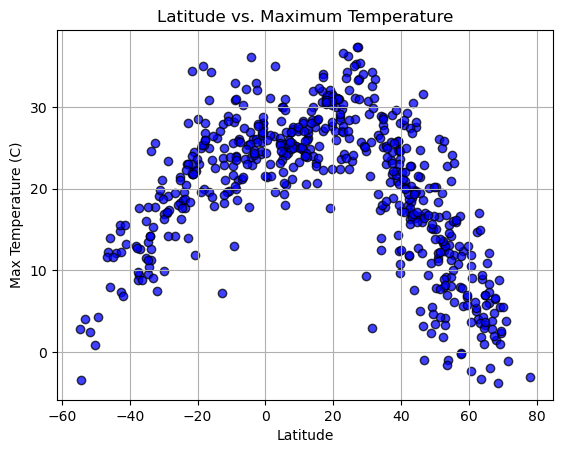

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

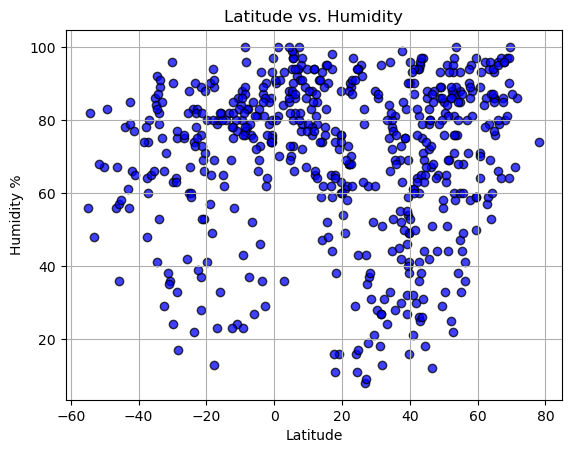

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

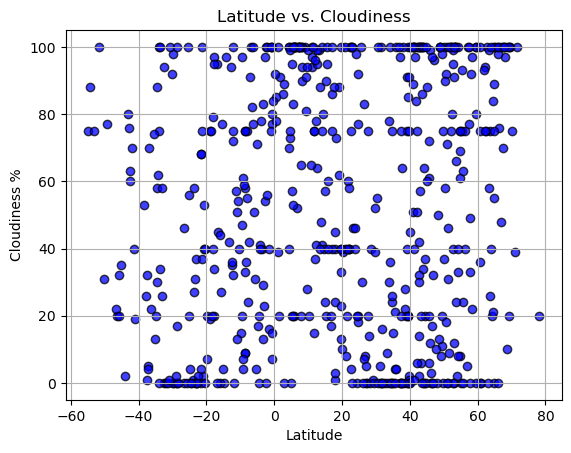

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

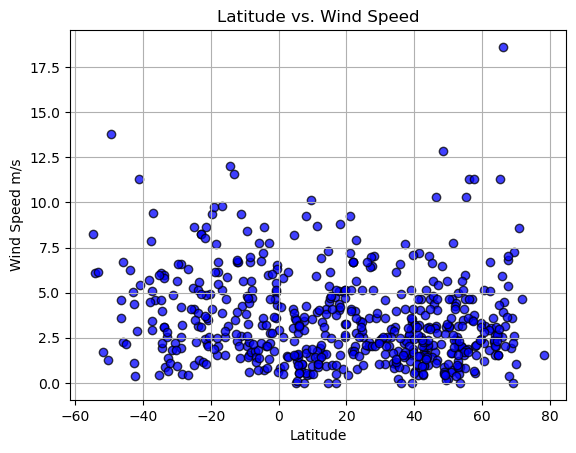

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed m/s")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lihue,21.9789,-159.3672,28.77,68,40,6.69,US,1695073242
4,albany,42.6001,-73.9662,17.12,94,100,0.45,US,1695073258
8,khanty-mansiysk,61.0042,69.0019,9.06,93,0,3.13,RU,1695073267
10,rongelap,11.1635,166.8941,28.24,76,94,5.90,MH,1695073268
12,hawaiian paradise park,19.5933,-154.9731,27.71,76,100,2.57,US,1695073008


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.12,78,2,6.26,NZ,1695073267
1,chonchi,-42.6128,-73.8092,7.29,79,60,1.11,CL,1695073267
3,puerto ayora,-0.7393,-90.3518,27.98,93,77,3.58,EC,1695073267
5,villa gesell,-37.2639,-56.9730,9.47,74,5,5.08,AR,1695073042
6,bredasdorp,-34.5322,20.0403,9.58,92,58,1.92,ZA,1695073267


###  Temperature vs. Latitude Linear Regression Plot

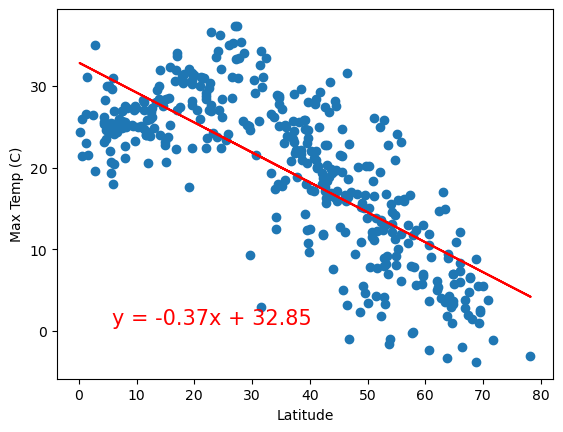

The r-squared value is: 0.5656248620629382.


396

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.show()
print(f'The r-squared value is: {rvalue**2}.')
x_values.count()

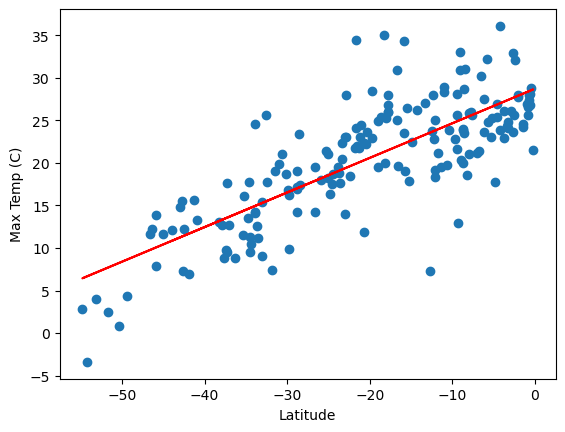

The r-squared value is: 0.6143544073133249.


180

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.show()
print(f'The r-squared value is: {rvalue**2}.')
x_values.count()

**Discussion about the linear relationship:** The r-squared value is lower in the southern hemisphere than the northern hemisphere. In both representations, it is clear that as the latitude approaches the equator (lat = 0), the maximum temperature increases. However, the data is more dispersed in the southern hemisphere than the north. This could be a skewed graph because based on the number of data points, it appears that the northern hemisphere has more points than the southern hemisphere graph, so this has to be taken into account, because a larger sample size will provide more representative data than a small sample size. This is confirmed by the number of counts - 396 in the northern hemisphere vs 180 in the southern hemisphere. We cannot simply just look at the r-squared value without looking at the dispersion of data points either. In this case, as the r-squared value is greated in the northern hemisphere, we can confirm that the dependent variable (temperature) is highly linked to the positon of the latitude, as the data is also far less dispersed in the northern hemisphere. In the southern hemisphere, the data is more dispersed, suggesting that if I was to predict the max temperature for a latitude based on the regression line, the margin of error is likely to be greater.

### Humidity vs. Latitude Linear Regression Plot

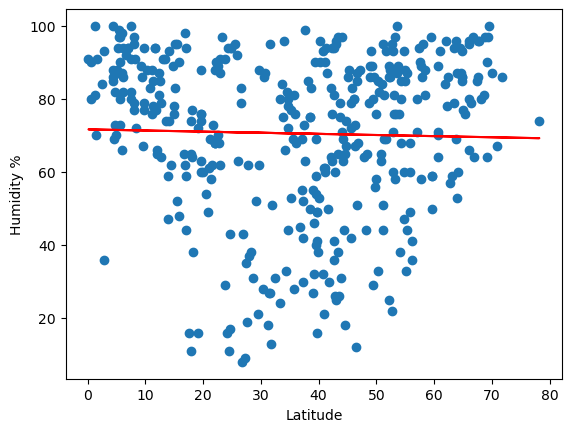

The r-squared value is: 0.0007246891130997531.


In [18]:
# Northern Hemisphere
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()
print(f'The r-squared value is: {rvalue**2}.')

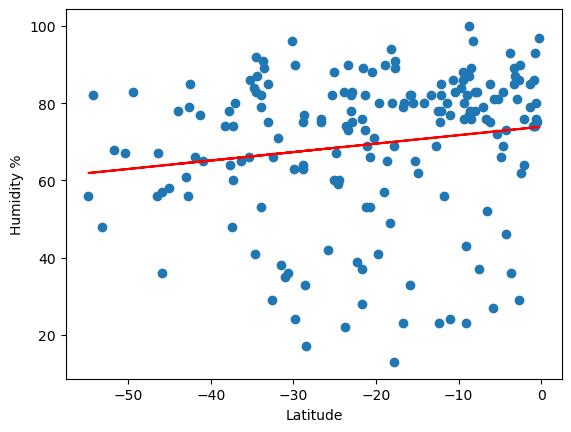

The r-squared value is: 0.025277460195941.


In [19]:
# Southern Hemisphere
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()
formatted_r_squared = '{:.15f}'.format(rvalue**2)
print(f'The r-squared value is: {formatted_r_squared}.')

**Discussion about the linear relationship:** The r-squared values for our dependent variable, humidity vs. the latitude is basically close to 0, which suggests that there is no relationship between the humidity vs the latitude of cities across the world. You can also see this quite clearly with the dispersion of the data, and the slope of the line, which is essentially horizontal. This suggests that there is almost no relationship between humidity and latitude, suggesting that another factor must be responsible which humidity is dependent on. Further analysis would be required here, against another independent variable. There is only a mild relationship between latitude and humidity in the northern hemisphere, but this is not enough to show a significant correlation between the two.

### Cloudiness vs. Latitude Linear Regression Plot

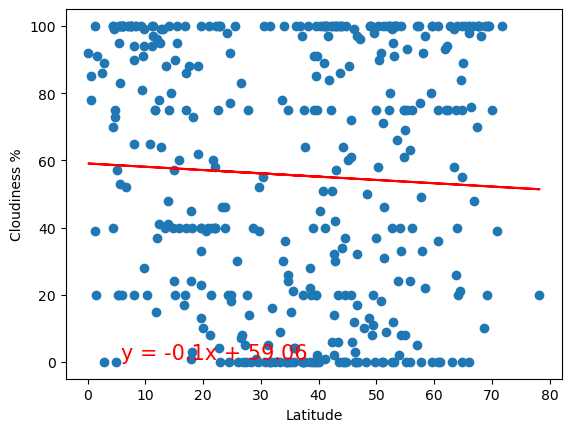

The r-squared value is: 0.0024643914481846476.


In [21]:
# Northern Hemisphere
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()
print(f'The r-squared value is: {rvalue**2}.')

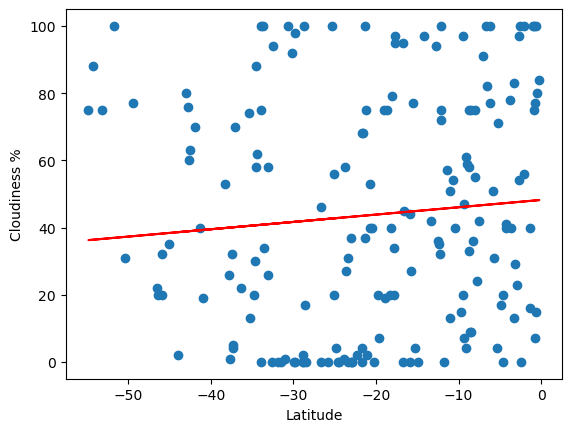

The r-squared value is: 0.007917752368895619.


In [22]:
# Southern Hemisphere
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()
print(f'The r-squared value is: {rvalue**2}.')

**Discussion about the linear relationship:** The r-squared values for our dependent variable, cloudiness vs. the latitude is basically close to 0, which suggests that there is no relationship between the cloudiness vs the latitude of cities across the world. You can also see this quite clearly with the dispersion of the data, and the slope of the line, which is essentially horizontal. This suggests that there is almost no relationship between cloudiness and latitude, suggesting that another factor must be responsible which cloudiness is dependent on. Further analysis would be required here, against another independent variable. There is only an extremely mild negative relationship between cloudiness and latitude, but once again, this is not enough to make a generalised comment on the correlation between the two. The southern hemisphere data shows that majority of latitude points plotted are closer to the equator than not, in the southern chart, and in the northern chart, the cloudiness is more spread out. 

### Wind Speed vs. Latitude Linear Regression Plot

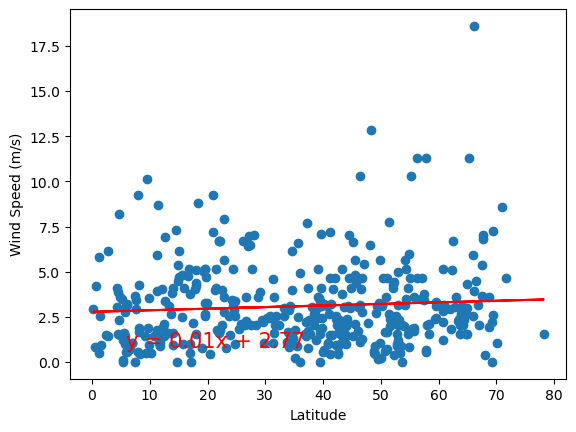

The r-squared value is: 0.005352509262085.


In [23]:
# Northern Hemisphere
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()
formatted_r_squared = '{:.15f}'.format(rvalue**2)
print(f'The r-squared value is: {formatted_r_squared}.')

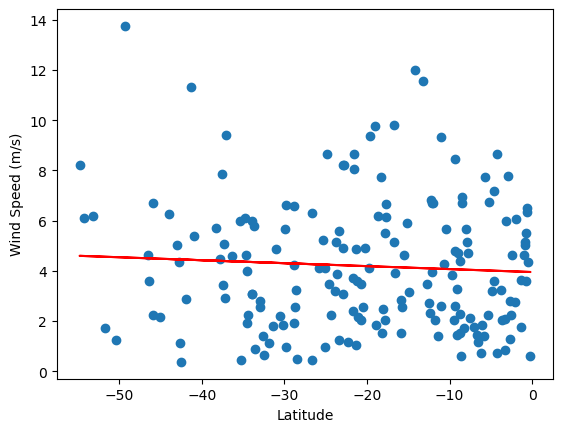

The r-squared value is: 0.004004633313287089.


In [24]:
# Southern Hemisphere
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()
print(f'The r-squared value is: {rvalue**2}.')

**Discussion about the linear relationship:** The r-squared values for our dependent variable, wind speed vs. the latitude is basically close to 0, which suggests that there is no relationship between the humidity vs the latitude of cities across the world irregardless of region of hemisphere. You can also see this quite clearly with the dispersion of the data, and the slope of the line, which is essentially horizontal for the northern hemisphere. This suggests that there is almost no relationship between humidity and latitude there, suggesting that another factor must be responsible which wind speed is dependent on. In the southern hemisphere however, this is slightly more data closer to the regression line, particularly as we look at wind speed closer to the equator. This suggests that there is a small possibility that the latitude is what impacts wind speed, but the r-squared value is still not significant enough for us to make this a definitive assumption unless other independent variables are also studied.